# **Project Title: Analyzing Global Economic Trends**

Agrima Gupta

## Project objective:
The goal of this project is to analyze global economic indicators using data mainly from the World Bank API. The analysis aims to uncover trends and relationships between key economic factors, such as GDP growth, inflation, unemployment, and trade, across countries and regions over the past decade (2013–2023).

## Data overview:(Include data source, year, number of observations)

1. Source: World Bank API
Indicators:

*   GDP (Current US$) and GDP Growth (Annual %)
*   Inflation (Consumer Prices, Annual %)

*   Official Exchange Rate (LCU per US$)
*   Trade (% of GDP)


*   Exports and Imports of Goods and Services (Current US$)
*   Unemployment (% of Total Labor Force)

*   Total Population
*   Foreign Direct Investment (Current US$)

*   Total Reserves (Current US$)

*   Government Education Spending (% of GDP)
*   Health Expenditure(% of GDP)



2. Additional Metadata:

Source: World Bank Country API

Attributes:

*   Country Name and Code
*   Region

*   Income Level

3. Time Period:

  Analysis spans 10 years (2013–2023).

pivoted_df: A structured DataFrame where each row corresponds to a country's yearly data, and columns represent economic indicators. Contains more than 2000 observation

df_country: Metadata containing country-specific attributes (e.g., region, income level). Contains around 290 observations.

social_pivoted_df: A structured DataFrame where each row corresponds to a country's yearly data, and columns represent social indicators. Contains more than 2000 observation.









## D1. Library imports

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import requests
import json
import os
import zipfile

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns


Using the World bank Country API to get the basic information like country name, Income Level and Region.

In [ ]:

# Fetching data from the World Bank API
url = "https://api.worldbank.org/v2/country?format=json&per_page=300"
response = requests.get(url)

# Ensuring the API call is successful
if response.status_code == 200:
    print("API call successful!")
    countries_metadata = response.json()


    countries_data = []
    for country in countries_metadata[1]:
        country_name = country.get('name')
        income_level = country.get('incomeLevel', {}).get('value', 'Unknown')
        region = country.get('region', {}).get('value', 'Unknown')


        countries_data.append({
            'Country': country_name,
            'Income Level': income_level,
            'Region': region
        })


    df_countries = pd.DataFrame(countries_data)


    output_file = "countries_metadata.xlsx"
    df_countries.to_excel(output_file, index=False)
    print(f"Data saved to {output_file}!")
else:
    print(f"API call failed with status code {response.status_code}")


API call successful!
Data saved to countries_metadata.xlsx!


In [ ]:
df_country = pd.read_excel("countries_metadata.xlsx")
df_country.head(10)

,Country,Income Level,Region
0,Aruba,High income,Latin America & Caribbean
1,Africa Eastern and Southern,Aggregates,Aggregates
2,Afghanistan,Low income,South Asia
3,Africa,Aggregates,Aggregates
4,Africa Western and Central,Aggregates,Aggregates
5,Angola,Lower middle income,Sub-Saharan Africa
6,Albania,Upper middle income,Europe & Central Asia
7,Andorra,High income,Europe & Central Asia
8,Arab World,Aggregates,Aggregates
9,United Arab Emirates,High income,Middle East & North Africa


Dropping the rows with Income Level as Aggregates and Not classified

In [ ]:
df_country= df_country[~df_country['Income Level'].isin(['Aggregates', 'Not classified'])]

In [ ]:
df_country.shape

(216, 3)

In [ ]:
df_country["Region"].unique()

array(['Latin America & Caribbean ', 'South Asia', 'Sub-Saharan Africa ',
       'Europe & Central Asia', 'Middle East & North Africa',
       'East Asia & Pacific', 'North America'], dtype=object)

Using World Bank indicators API to get information like GDP, Inflation rate, Trade, Unemployment Rate, Governmnet Debt etc for past 10 years

In [ ]:
base_url = "https://api.worldbank.org/v2/country/all/indicator"


indicators = {
    "NY.GDP.MKTP.CD": "GDP (Current US$)",
    "NY.GDP.MKTP.KD.ZG": "GDP Growth (Annual %)",
    "FP.CPI.TOTL.ZG": "Inflation (Consumer Prices, Annual %)",
    "PA.NUS.FCRF": "Official Exchange Rate (LCU per US$)",
    "NE.TRD.GNFS.ZS": "Trade (% of GDP)",
    "BX.KLT.DINV.CD.WD": "Foreign Direct Investment (Current US$)",
    "NE.EXP.GNFS.CD": "Exports of Goods and Services (Current US$)",
    "NE.IMP.GNFS.CD": "Imports of Goods and Services (Current US$)",
    "SP.POP.TOTL": "Total Population",
    "SL.UEM.TOTL.ZS": "Unemployment (% of Total Labor Force)",
    "FR.INR.LEND": "Lending Interest Rate (%)"
}


start_year = 2013
end_year = 2024


econ_data = pd.DataFrame()


for indicator_code, indicator_name in indicators.items():
    print(f"Fetching data for indicator: {indicator_name}...")
    url = f"{base_url}/{indicator_code}?format=json&date={start_year}:{end_year}&per_page=20000"
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()


        if isinstance(data, list) and len(data) > 1 and isinstance(data[1], list):
            indicator_data = []
            for record in data[1]:
                country = record.get('country', {}).get('value', 'Unknown')
                year = record.get('date', 'Unknown')
                value = record.get('value', None)

                indicator_data.append({
                    "Country": country,
                    "Year": year,
                    "Indicator": indicator_name,
                    "Value": value
                })


            indicator_df = pd.DataFrame(indicator_data)


        econ_data = pd.concat([econ_data, indicator_df], ignore_index=True)
    else:
        print(f"No data available for {indicator_name} or unexpected structure.")
else:
        print(f"Failed to fetch data for {indicator_name}. Status code: {response.status_code}")

print("Data fetching complete!")



Fetching data for indicator: GDP (Current US$)...
Fetching data for indicator: GDP Growth (Annual %)...
Fetching data for indicator: Inflation (Consumer Prices, Annual %)...
Fetching data for indicator: Official Exchange Rate (LCU per US$)...
Fetching data for indicator: Trade (% of GDP)...
Fetching data for indicator: Foreign Direct Investment (Current US$)...
Fetching data for indicator: Exports of Goods and Services (Current US$)...
Fetching data for indicator: Imports of Goods and Services (Current US$)...
Fetching data for indicator: Total Population...
Fetching data for indicator: Unemployment (% of Total Labor Force)...
Fetching data for indicator: Lending Interest Rate (%)...
Failed to fetch data for Lending Interest Rate (%). Status code: 200
Data fetching complete!


In [ ]:
econ_data.head()

,Country,Year,Indicator,Value
0,Africa Eastern and Southern,2023,GDP (Current US$),1.236163e+12
1,Africa Eastern and Southern,2022,GDP (Current US$),1.183962e+12
2,Africa Eastern and Southern,2021,GDP (Current US$),1.086772e+12
3,Africa Eastern and Southern,2020,GDP (Current US$),9.290741e+11
4,Africa Eastern and Southern,2019,GDP (Current US$),1.006527e+12


In [ ]:
econ_data.shape

(32186, 4)

In [ ]:
df_country= df_country[~df_country['Income Level'].isin(['Aggregates', 'Not classified'])]

I just want to keep the data for the countries, so removing rows that contains aggregated data.

In [ ]:
econ_data = econ_data[~econ_data['Country'].isin(['Africa Eastern and Southern', 'Africa Western and Central',
       'Arab World', 'Caribbean small states',
       'Central Europe and the Baltics''Early-demographic dividend',
       'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)',
       'East Asia & Pacific (IDA & IBRD countries)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)',
       'Europe & Central Asia (IDA & IBRD countries)', 'European Union',
       'Fragile and conflict affected situations',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'IBRD only', 'IDA & IBRD total', 'IDA blend', 'IDA only',
       'IDA total', 'Late-demographic dividend', 'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Latin America & Caribbean (IDA & IBRD countries)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa (excluding high income)',
       'Middle East & North Africa (IDA & IBRD countries)',
       'Middle income','Not classified', 'OECD members',
       'Other small states', 'Pacific island small states',
       'Post-demographic dividend', 'Pre-demographic dividend',
       'Small states', 'South Asia', 'South Asia (IDA & IBRD)',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Sub-Saharan Africa (IDA & IBRD countries)', 'Upper middle income',
       'World'])]

In [ ]:
econ_data.shape

(26862, 4)

Using World Bank indicators API to get information like Primary School Enrollment, Health Expenditure, CO2 Emission per capita, etc for past 10 years

In [ ]:
import requests
import pandas as pd


base_url = "https://api.worldbank.org/v2/country/all/indicator"


indicators = {
    "SE.PRM.ENRR": "Primary School Enrollment (%)",
    "SE.SEC.ENRR": "Secondary School Enrollment (%)",
    "SE.XPD.TOTL.GD.ZS": "Government Education Spending (% of GDP)",
    "SP.DYN.LE00.IN": "Life Expectancy (Years)",
    "SP.DYN.LE00.MA.IN": "Male Life Expectancy (Years)",
    "SP.DYN.LE00.FE.IN": "Female Life Expectancy (Years)",
    "SH.XPD.CHEX.PC.CD": "Health Expenditure Per Capita (Current US$)",
    "SH.XPD.CHEX.GD.ZS": "Health Expenditure (% of GDP)",
    "EN.ATM.CO2E.PC": "CO2 Emissions per capita",
    "EG.CFT.ACCS.ZS": "Access to Clean Fuels and Technology (% of population)"
}


start_year = 2013
end_year = 2024


social_data = pd.DataFrame()


for indicator_code, indicator_name in indicators.items():
    print(f"Fetching data for indicator: {indicator_name}...")
    url = f"{base_url}/{indicator_code}?format=json&date={start_year}:{end_year}&per_page=20000"
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()


        if isinstance(data, list) and len(data) > 1 and isinstance(data[1], list):
            indicator_data = []
            for record in data[1]:
                country = record.get('country', {}).get('value', 'Unknown')
                year = record.get('date', 'Unknown')
                value = record.get('value', None)

                indicator_data.append({
                    "Country": country,
                    "Year": year,
                    "Indicator": indicator_name,
                    "Value": value
                })


            indicator_df = pd.DataFrame(indicator_data)


            social_data = pd.concat([social_data, indicator_df], ignore_index=True)
        else:
            print(f"No data available for {indicator_name} or unexpected structure.")
    else:
        print(f"Failed to fetch data for {indicator_name}. Status code: {response.status_code}")

print("Data fetching complete!")




Fetching data for indicator: Primary School Enrollment (%)...
Fetching data for indicator: Secondary School Enrollment (%)...
Fetching data for indicator: Government Education Spending (% of GDP)...
Fetching data for indicator: Life Expectancy (Years)...
Fetching data for indicator: Male Life Expectancy (Years)...
Fetching data for indicator: Female Life Expectancy (Years)...
Fetching data for indicator: Health Expenditure Per Capita (Current US$)...
Fetching data for indicator: Health Expenditure (% of GDP)...
Fetching data for indicator: CO2 Emissions per capita...
No data available for CO2 Emissions per capita or unexpected structure.
Fetching data for indicator: Access to Clean Fuels and Technology (% of population)...
Data fetching complete!


As done previously removing aggregated data.

In [ ]:
social_data = social_data[~social_data['Country'].isin(['Africa Eastern and Southern', 'Africa Western and Central',
       'Arab World', 'Caribbean small states',
       'Central Europe and the Baltics''Early-demographic dividend',
       'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)',
       'East Asia & Pacific (IDA & IBRD countries)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)',
       'Europe & Central Asia (IDA & IBRD countries)', 'European Union',
       'Fragile and conflict affected situations',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'IBRD only', 'IDA & IBRD total', 'IDA blend', 'IDA only',
       'IDA total', 'Late-demographic dividend', 'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Latin America & Caribbean (IDA & IBRD countries)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa (excluding high income)',
       'Middle East & North Africa (IDA & IBRD countries)',
       'Middle income','Not classified', 'OECD members',
       'Other small states', 'Pacific island small states',
       'Post-demographic dividend', 'Pre-demographic dividend',
       'Small states', 'South Asia', 'South Asia (IDA & IBRD)',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Sub-Saharan Africa (IDA & IBRD countries)', 'Upper middle income',
       'World'])]

In [ ]:
social_data.shape

(21978, 4)

In [ ]:
social_data.head()

,Country,Year,Indicator,Value
44,Central Europe and the Baltics,2023,Primary School Enrollment (%),97.060959
45,Central Europe and the Baltics,2022,Primary School Enrollment (%),97.046539
46,Central Europe and the Baltics,2021,Primary School Enrollment (%),96.933640
47,Central Europe and the Baltics,2020,Primary School Enrollment (%),91.684464
48,Central Europe and the Baltics,2019,Primary School Enrollment (%),95.895370


##D2. Data pre-processing

First I am pivoting the indicator column in the all_data. So that each indicator becomes column for better understanding.

In [ ]:

pivoted_df = econ_data.pivot_table(
    index=["Country", "Year"],
    columns="Indicator",
    values="Value"
).reset_index()



In [ ]:
print("Data after transformation:")
pivoted_df.head()

Data after transformation:


Indicator,Country,Year,Exports of Goods and Services (Current US$),Foreign Direct Investment (Current US$),GDP (Current US$),GDP Growth (Annual %),Imports of Goods and Services (Current US$),"Inflation (Consumer Prices, Annual %)",Lending Interest Rate (%),Official Exchange Rate (LCU per US$),Total Population,Trade (% of GDP),Unemployment (% of Total Labor Force)
0,Afghanistan,2013,NaN,4.831135e+07,2.014642e+10,5.600745,NaN,7.385772,15.079167,55.377500,31541209.0,NaN,7.919
1,Afghanistan,2014,NaN,4.297526e+07,2.049713e+10,2.724543,NaN,4.673996,15.000000,57.247500,32716210.0,NaN,7.915
2,Afghanistan,2015,NaN,1.691466e+08,1.913422e+10,1.451315,NaN,-0.661709,15.000000,61.143462,33753499.0,NaN,9.011
3,Afghanistan,2016,NaN,9.359132e+07,1.811657e+10,2.260314,NaN,4.383892,15.000000,67.866086,34636207.0,NaN,10.100
4,Afghanistan,2017,NaN,5.153390e+07,1.875346e+10,2.647003,NaN,4.975952,14.836667,68.026904,35643418.0,NaN,11.184


In [ ]:
pivoted_df.shape

(2442, 13)

Next I am pivitoing the indicator column in social_data.

In [ ]:

social_pivoted_df = social_data.pivot_table(
    index=["Country", "Year"],
    columns="Indicator",
    values="Value"
).reset_index()

In [ ]:
print("Data after transformation:")
social_pivoted_df.head()

Data after transformation:


Indicator,Country,Year,Access to Clean Fuels and Technology (% of population),Female Life Expectancy (Years),Government Education Spending (% of GDP),Health Expenditure (% of GDP),Health Expenditure Per Capita (Current US$),Life Expectancy (Years),Male Life Expectancy (Years),Primary School Enrollment (%),Secondary School Enrollment (%)
0,Afghanistan,2013,24.5,64.027,3.45446,8.805964,56.305542,62.417,60.791,107.695976,54.754219
1,Afghanistan,2014,26.1,64.274,3.69522,9.528878,60.189579,62.545,60.812,109.115517,54.235481
2,Afghanistan,2015,27.6,64.576,3.25580,10.105348,60.058540,62.659,60.760,106.182419,53.285141
3,Afghanistan,2016,28.8,65.096,4.54397,11.818590,61.486458,63.136,61.193,106.150284,53.506340
4,Afghanistan,2017,30.3,66.099,4.34319,12.620817,66.909218,63.016,60.105,106.129997,55.402149


In [ ]:
social_pivoted_df.shape

(2319, 11)

First I am going to do the data processing of econ_data file which contains the economics indicators. The file is called as pivoted_df after pivoting the indicator column.

In [ ]:
pivoted_df.isnull().sum().sum()

0

In [ ]:
print("Missing values in the dataset:")
pivoted_df.isnull().sum()

Missing values in the dataset:


,0
Indicator,
Country,0
Year,0
Exports of Goods and Services (Current US$),0
Foreign Direct Investment (Current US$),0
GDP (Current US$),0
GDP Growth (Annual %),0
Imports of Goods and Services (Current US$),0
"Inflation (Consumer Prices, Annual %)",0
Lending Interest Rate (%),0


In [ ]:
missing_lending_rate = pivoted_df[pivoted_df["Lending Interest Rate (%)"].isnull()]

print("Rows where 'Lending Interest Rate (%)' is null:")
missing_lending_rate

Rows where 'Lending Interest Rate (%)' is null:


Indicator,Country,Year,Exports of Goods and Services (Current US$),Foreign Direct Investment (Current US$),GDP (Current US$),GDP Growth (Annual %),Imports of Goods and Services (Current US$),"Inflation (Consumer Prices, Annual %)",Lending Interest Rate (%),Official Exchange Rate (LCU per US$),Total Population,Trade (% of GDP),Unemployment (% of Total Labor Force)


Since the Lending rate is missing for country altogether, there is a possibility that the contries might not have Lending rate Interest or no formal Lending market

In [ ]:

pivoted_df.loc[:, "Lending Interest Rate (%)"] = pivoted_df["Lending Interest Rate (%)"].fillna(0)


print(pivoted_df["Lending Interest Rate (%)"].isnull().sum())


0


Filling the null values with 0 or using the median/mean for rest of the columns with null values

In [ ]:
pivoted_df.loc[:,"Foreign Direct Investment (Current US$)"] = pivoted_df["Foreign Direct Investment (Current US$)"].fillna(0)


In [ ]:
median_inflation = pivoted_df["Inflation (Consumer Prices, Annual %)"].median()
pivoted_df["Inflation (Consumer Prices, Annual %)"] = pivoted_df["Inflation (Consumer Prices, Annual %)"].fillna(median_inflation)


In [ ]:

regional_means = pivoted_df.groupby('Country')["Exports of Goods and Services (Current US$)"].transform('mean')

pivoted_df["Exports of Goods and Services (Current US$)"] = pivoted_df["Exports of Goods and Services (Current US$)"].fillna(regional_means)


In [ ]:
regional_means = pivoted_df.groupby('Country')["Imports of Goods and Services (Current US$)"].transform('mean')

pivoted_df["Imports of Goods and Services (Current US$)"] = pivoted_df["Imports of Goods and Services (Current US$)"].fillna(regional_means)

In [ ]:
pivoted_df.loc[:, "Exports of Goods and Services (Current US$)"] = pivoted_df["Exports of Goods and Services (Current US$)"].fillna(0)
pivoted_df.loc[:, "Imports of Goods and Services (Current US$)"] = pivoted_df["Imports of Goods and Services (Current US$)"].fillna(0)

In [ ]:
pivoted_df.isnull().sum()

,0
Indicator,
Country,0
Year,0
Exports of Goods and Services (Current US$),0
Foreign Direct Investment (Current US$),0
GDP (Current US$),0
GDP Growth (Annual %),0
Imports of Goods and Services (Current US$),0
"Inflation (Consumer Prices, Annual %)",0
Lending Interest Rate (%),0


In [ ]:
pivoted_df["Trade (% of GDP)"] = pivoted_df["Trade (% of GDP)"].fillna(
    (pivoted_df["Exports of Goods and Services (Current US$)"] +
     pivoted_df["Imports of Goods and Services (Current US$)"]) /
    pivoted_df["GDP (Current US$)"]
)


In [ ]:
pivoted_df = pivoted_df.dropna(subset=["GDP (Current US$)"])


In [ ]:

pivoted_df = pivoted_df.sort_values(by=["Country", "Year"])


pivoted_df["GDP Growth (Annual %)"] = (
    pivoted_df.groupby("Country")["GDP Growth (Annual %)"]
    .apply(lambda group: group.interpolate(method="linear"))
    .reset_index(drop=True)
)


In [ ]:
pivoted_df.loc[:, "GDP Growth (Annual %)"] = pivoted_df["GDP Growth (Annual %)"].fillna(0)

In [ ]:
median_exchange_rate = pivoted_df["Official Exchange Rate (LCU per US$)"].median()
pivoted_df["Official Exchange Rate (LCU per US$)"] = pivoted_df["Official Exchange Rate (LCU per US$)"].fillna(median_exchange_rate)



In [ ]:
median_unemployment = pivoted_df["Unemployment (% of Total Labor Force)"].median()
pivoted_df["Unemployment (% of Total Labor Force)"] = pivoted_df["Unemployment (% of Total Labor Force)"].fillna(median_unemployment)



In [ ]:
median_population = pivoted_df["Total Population"].median()
pivoted_df["Total Population"] = pivoted_df["Total Population"].fillna(median_population)


In [ ]:
pivoted_df.isnull().sum()

,0
Indicator,
Country,0
Year,0
Exports of Goods and Services (Current US$),0
Foreign Direct Investment (Current US$),0
GDP (Current US$),0
GDP Growth (Annual %),0
Imports of Goods and Services (Current US$),0
"Inflation (Consumer Prices, Annual %)",0
Lending Interest Rate (%),0


In [ ]:
pivoted_df.head()

Indicator,Country,Year,Exports of Goods and Services (Current US$),Foreign Direct Investment (Current US$),GDP (Current US$),GDP Growth (Annual %),Imports of Goods and Services (Current US$),"Inflation (Consumer Prices, Annual %)",Lending Interest Rate (%),Official Exchange Rate (LCU per US$),Total Population,Trade (% of GDP),Unemployment (% of Total Labor Force)
0,Afghanistan,2013,2.263732e+09,4.831135e+07,2.014642e+10,5.600745,6.811605e+09,7.385772,15.079167,55.377500,31541209.0,0.450469,7.919
1,Afghanistan,2014,2.263732e+09,4.297526e+07,2.049713e+10,2.724543,6.811605e+09,4.673996,15.000000,57.247500,32716210.0,0.442761,7.915
2,Afghanistan,2015,2.263732e+09,1.691466e+08,1.913422e+10,1.451315,6.811605e+09,-0.661709,15.000000,61.143462,33753499.0,0.474299,9.011
3,Afghanistan,2016,2.263732e+09,9.359132e+07,1.811657e+10,2.260314,6.811605e+09,4.383892,15.000000,67.866086,34636207.0,0.500941,10.100
4,Afghanistan,2017,2.263732e+09,5.153390e+07,1.875346e+10,2.647003,6.811605e+09,4.975952,14.836667,68.026904,35643418.0,0.483929,11.184


In [ ]:
pivoted_df.shape

(2332, 13)

In [ ]:
pivoted_df.dtypes

,0
Indicator,
Country,object
Year,object
Exports of Goods and Services (Current US$),float64
Foreign Direct Investment (Current US$),float64
GDP (Current US$),float64
GDP Growth (Annual %),float64
Imports of Goods and Services (Current US$),float64
"Inflation (Consumer Prices, Annual %)",float64
Lending Interest Rate (%),float64


For the second data file df_country, checking for Null values

In [ ]:
df_country.isnull().sum().sum()

0

In [ ]:
df_country.dtypes

,0
Country,object
Income Level,object
Region,object


Now doing data analysis for social_data which is called social_pivoted_df. Checking for null values.

In [ ]:
social_pivoted_df.isnull().sum().sum()

3849

In [ ]:
social_pivoted_df.isnull().sum()

,0
Indicator,
Country,0
Year,0
Access to Clean Fuels and Technology (% of population),379
Female Life Expectancy (Years),173
Government Education Spending (% of GDP),580
Health Expenditure (% of GDP),576
Health Expenditure Per Capita (Current US$),577
Life Expectancy (Years),173
Male Life Expectancy (Years),173


Filling the null values with 0 or using the median/mean for rest of the columns with null values.

In [ ]:
primary_mean = social_pivoted_df.groupby('Country')["Primary School Enrollment (%)"].transform('mean')
social_pivoted_df["Primary School Enrollment (%)"] = social_pivoted_df["Primary School Enrollment (%)"].fillna(primary_mean)

secondary_mean = social_pivoted_df.groupby('Country')["Secondary School Enrollment (%)"].transform('mean')
social_pivoted_df["Secondary School Enrollment (%)"] = social_pivoted_df["Secondary School Enrollment (%)"].fillna(secondary_mean)

In [ ]:
missing_primary = social_pivoted_df[social_pivoted_df["Primary School Enrollment (%)"].isnull()]

missing_primary.head(10)

Indicator,Country,Year,Access to Clean Fuels and Technology (% of population),Female Life Expectancy (Years),Government Education Spending (% of GDP),Health Expenditure (% of GDP),Health Expenditure Per Capita (Current US$),Life Expectancy (Years),Male Life Expectancy (Years),Primary School Enrollment (%),Secondary School Enrollment (%)
412,Channel Islands,2013,NaN,83.659,NaN,NaN,NaN,81.516,79.310,NaN,NaN
413,Channel Islands,2014,NaN,84.057,NaN,NaN,NaN,81.884,79.649,NaN,NaN
414,Channel Islands,2015,NaN,83.552,NaN,NaN,NaN,81.433,79.268,NaN,NaN
415,Channel Islands,2016,NaN,83.474,NaN,NaN,NaN,81.366,79.220,NaN,NaN
416,Channel Islands,2017,NaN,83.481,NaN,NaN,NaN,81.331,79.158,NaN,NaN
417,Channel Islands,2018,NaN,83.525,NaN,NaN,NaN,81.375,79.205,NaN,NaN
418,Channel Islands,2019,NaN,83.499,NaN,NaN,NaN,81.390,79.266,NaN,NaN
419,Channel Islands,2020,NaN,83.387,NaN,NaN,NaN,81.264,79.141,NaN,NaN
420,Channel Islands,2021,NaN,83.355,NaN,NaN,NaN,81.232,79.115,NaN,NaN
421,Channel Islands,2022,NaN,83.635,NaN,NaN,NaN,81.583,79.521,NaN,NaN


Since the data for enrollement is missing for the country together, so filling that with 0.

In [ ]:
# Fill missing values for enrollment indicators with 0
social_pivoted_df[["Primary School Enrollment (%)", "Secondary School Enrollment (%)"]] = social_pivoted_df[
    ["Primary School Enrollment (%)", "Secondary School Enrollment (%)"]
].fillna(0)

print("Missing values for enrollment indicators have been filled with 0.")


Missing values for enrollment indicators have been filled with 0.


In [ ]:

missing_life_expectancy = social_pivoted_df[
    social_pivoted_df[["Life Expectancy (Years)", "Male Life Expectancy (Years)", "Female Life Expectancy (Years)"]].isnull().any(axis=1)
]
missing_life_expectancy.head(10)


Indicator,Country,Year,Access to Clean Fuels and Technology (% of population),Female Life Expectancy (Years),Government Education Spending (% of GDP),Health Expenditure (% of GDP),Health Expenditure Per Capita (Current US$),Life Expectancy (Years),Male Life Expectancy (Years),Primary School Enrollment (%),Secondary School Enrollment (%)
20,Albania,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.713814,96.136879
31,Algeria,2023,NaN,NaN,5.610157,NaN,NaN,NaN,NaN,108.761642,102.702148
32,Andorra,2013,100.0,NaN,2.506160,6.799642,3041.841553,NaN,NaN,87.653519,90.965668
33,Andorra,2014,100.0,NaN,3.074210,6.773080,3089.843018,NaN,NaN,88.235291,91.874069
34,Andorra,2015,100.0,NaN,3.280350,6.915864,2688.206299,NaN,NaN,88.955353,92.545799
35,Andorra,2016,100.0,NaN,3.237070,6.905218,2755.448486,NaN,NaN,90.171944,94.209068
36,Andorra,2017,100.0,NaN,3.217090,7.071426,2873.296143,NaN,NaN,89.371071,94.369751
37,Andorra,2018,100.0,NaN,3.246720,7.375417,3164.388428,NaN,NaN,89.674477,95.090599
38,Andorra,2019,100.0,NaN,3.150610,7.323246,3026.597412,NaN,NaN,89.352898,95.684059
39,Andorra,2020,100.0,NaN,2.632130,8.786739,3269.297363,NaN,NaN,88.717087,96.462753


In [ ]:

for col in ["Life Expectancy (Years)", "Male Life Expectancy (Years)", "Female Life Expectancy (Years)"]:
    social_pivoted_df.loc[:, col] = social_pivoted_df.groupby("Country")[col].transform(lambda x: x.interpolate(method="linear"))


In [ ]:
missing_countries = social_pivoted_df[social_pivoted_df[["Life Expectancy (Years)", "Male Life Expectancy (Years)", "Female Life Expectancy (Years)"]].isnull().any(axis=1)]
print(missing_countries["Country"].unique())


['Andorra' 'Cayman Islands' 'Monaco' 'Palau' 'San Marino']


In [ ]:
for col in ["Life Expectancy (Years)", "Male Life Expectancy (Years)", "Female Life Expectancy (Years)"]:
    social_pivoted_df.loc[:, col] = social_pivoted_df.groupby("Year")[col].transform(lambda x: x.fillna(x.mean()))



In [ ]:
social_pivoted_df.loc[:, "Access to Clean Fuels and Technology (% of population)"] = social_pivoted_df.groupby("Country")[
    "Access to Clean Fuels and Technology (% of population)"
].transform(lambda x: x.fillna(x.mean()))


global_avg_clean_fuels = social_pivoted_df["Access to Clean Fuels and Technology (% of population)"].mean()
social_pivoted_df.loc[:, "Access to Clean Fuels and Technology (% of population)"] = social_pivoted_df[
    "Access to Clean Fuels and Technology (% of population)"
].fillna(global_avg_clean_fuels)



In [ ]:

social_pivoted_df.loc[:, "Government Education Spending (% of GDP)"] = social_pivoted_df.groupby("Country")[
    "Government Education Spending (% of GDP)"
].transform(lambda x: x.interpolate(method="linear"))


global_avg_education_spending = social_pivoted_df["Government Education Spending (% of GDP)"].mean()
social_pivoted_df.loc[:, "Government Education Spending (% of GDP)"] = social_pivoted_df[
    "Government Education Spending (% of GDP)"
].fillna(global_avg_education_spending)


In [ ]:

social_pivoted_df.loc[:, "Health Expenditure (% of GDP)"] = social_pivoted_df.groupby("Country")[
    "Health Expenditure (% of GDP)"
].transform(lambda x: x.interpolate(method="linear"))


global_avg_health_expenditure = social_pivoted_df["Health Expenditure (% of GDP)"].mean()
social_pivoted_df.loc[:, "Health Expenditure (% of GDP)"] = social_pivoted_df[
    "Health Expenditure (% of GDP)"
].fillna(global_avg_health_expenditure)


In [ ]:

social_pivoted_df.loc[:, "Health Expenditure Per Capita (Current US$)"] = social_pivoted_df.groupby("Country")[
    "Health Expenditure Per Capita (Current US$)"
].transform(lambda x: x.interpolate(method="linear"))


global_avg_health_expenditure_per_capita = social_pivoted_df["Health Expenditure Per Capita (Current US$)"].mean()
social_pivoted_df.loc[:, "Health Expenditure Per Capita (Current US$)"] = social_pivoted_df[
    "Health Expenditure Per Capita (Current US$)"
].fillna(global_avg_health_expenditure_per_capita)


In [ ]:
social_pivoted_df.isnull().sum()

,0
Indicator,
Country,0
Year,0
Access to Clean Fuels and Technology (% of population),0
Female Life Expectancy (Years),0
Government Education Spending (% of GDP),0
Health Expenditure (% of GDP),0
Health Expenditure Per Capita (Current US$),0
Life Expectancy (Years),0
Male Life Expectancy (Years),0


In [ ]:
social_pivoted_df.shape

(2319, 11)

## D3. Data analysis


For the analysis of the data, I decided to do analysis based on the income levels. There are 4 income levels: High, Upper Middle, Lower Middle and Low. I have tried to analyse the different indicatore like health expendiutre, education, unemployment etc with the income levels.

### Question 1

What is the distribution of countries across different income levels, and which income level category has the highest number of countries?"

In [ ]:

income_level_counts = df_country.groupby("Income Level")["Country"].nunique().reset_index()
income_level_counts.columns = ["Income Level", "Number of Countries"]
income_level_counts = income_level_counts.sort_values(by="Number of Countries", ascending=False)


income_level_counts.head()


,Income Level,Number of Countries
0,High income,85
3,Upper middle income,54
2,Lower middle income,51
1,Low income,26


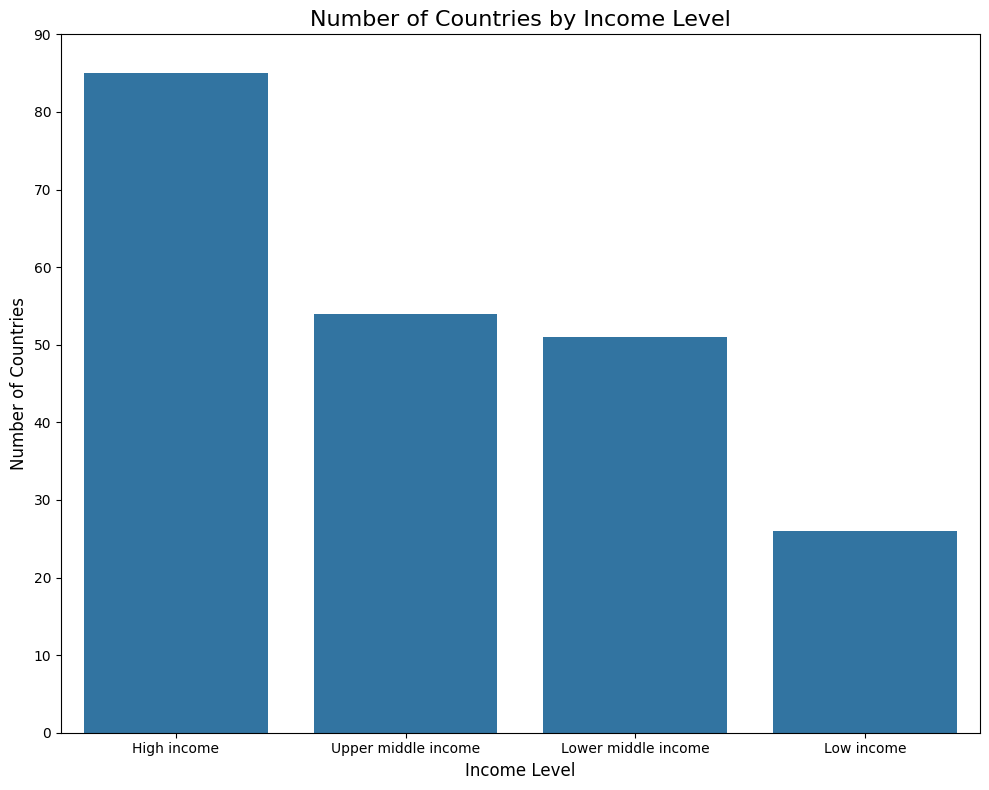

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(
    data=income_level_counts,
    x="Income Level",
    y="Number of Countries"

)
plt.title("Number of Countries by Income Level", fontsize=16)
plt.xlabel("Income Level", fontsize=12)
plt.ylabel("Number of Countries", fontsize=12)
y_max = income_level_counts["Number of Countries"].max()
plt.yticks(range(0, y_max + 10, 10))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

From the above analysis we can see that most of the countries are High Income countries followed by Upper middle and Lower middle income. This suggests that globally, a significant number of countries have relatively strong economies with higher GDP per capita.

### Question 2

How do key economic indicators such as GDP, Trade, Inflation, and Foreign Direct Investment vary across different income levels?


#### Answer

I am merging the country dataset with ecnomic indicators on country.

In [ ]:
merged_df = pivoted_df.merge(df_country, on="Country", how="left")


merged_df.head()


,Country,Year,Exports of Goods and Services (Current US$),Foreign Direct Investment (Current US$),GDP (Current US$),GDP Growth (Annual %),Imports of Goods and Services (Current US$),"Inflation (Consumer Prices, Annual %)",Lending Interest Rate (%),Official Exchange Rate (LCU per US$),Total Population,Trade (% of GDP),Unemployment (% of Total Labor Force),Income Level,Region
0,Afghanistan,2013,2.263732e+09,4.831135e+07,2.014642e+10,5.600745,6.811605e+09,7.385772,15.079167,55.377500,31541209.0,0.450469,7.919,Low income,South Asia
1,Afghanistan,2014,2.263732e+09,4.297526e+07,2.049713e+10,2.724543,6.811605e+09,4.673996,15.000000,57.247500,32716210.0,0.442761,7.915,Low income,South Asia
2,Afghanistan,2015,2.263732e+09,1.691466e+08,1.913422e+10,1.451315,6.811605e+09,-0.661709,15.000000,61.143462,33753499.0,0.474299,9.011,Low income,South Asia
3,Afghanistan,2016,2.263732e+09,9.359132e+07,1.811657e+10,2.260314,6.811605e+09,4.383892,15.000000,67.866086,34636207.0,0.500941,10.100,Low income,South Asia
4,Afghanistan,2017,2.263732e+09,5.153390e+07,1.875346e+10,2.647003,6.811605e+09,4.975952,14.836667,68.026904,35643418.0,0.483929,11.184,Low income,South Asia


I have taken the indicators like GDP, Trade, Inflation and Foreign Direct Investment and see how they vary across the different income brackets.

In [ ]:

key_indicators = [
    "GDP (Current US$)",
    "Trade (% of GDP)",
    "Inflation (Consumer Prices, Annual %)",
    "Foreign Direct Investment (Current US$)"
]


grouped_economic_indicators = merged_df.groupby("Income Level")[key_indicators].mean()


grouped_economic_indicators.head()



,GDP (Current US$),Trade (% of GDP),"Inflation (Consumer Prices, Annual %)",Foreign Direct Investment (Current US$)
Income Level,,,,
High income,7.021955e+11,101.516021,2.506899,1.570525e+10
Low income,1.832708e+10,49.226970,9.692609,6.474303e+08
Lower middle income,1.177398e+11,69.331240,8.125678,2.115833e+09
Upper middle income,4.354474e+11,68.294973,5.029673,8.354122e+09


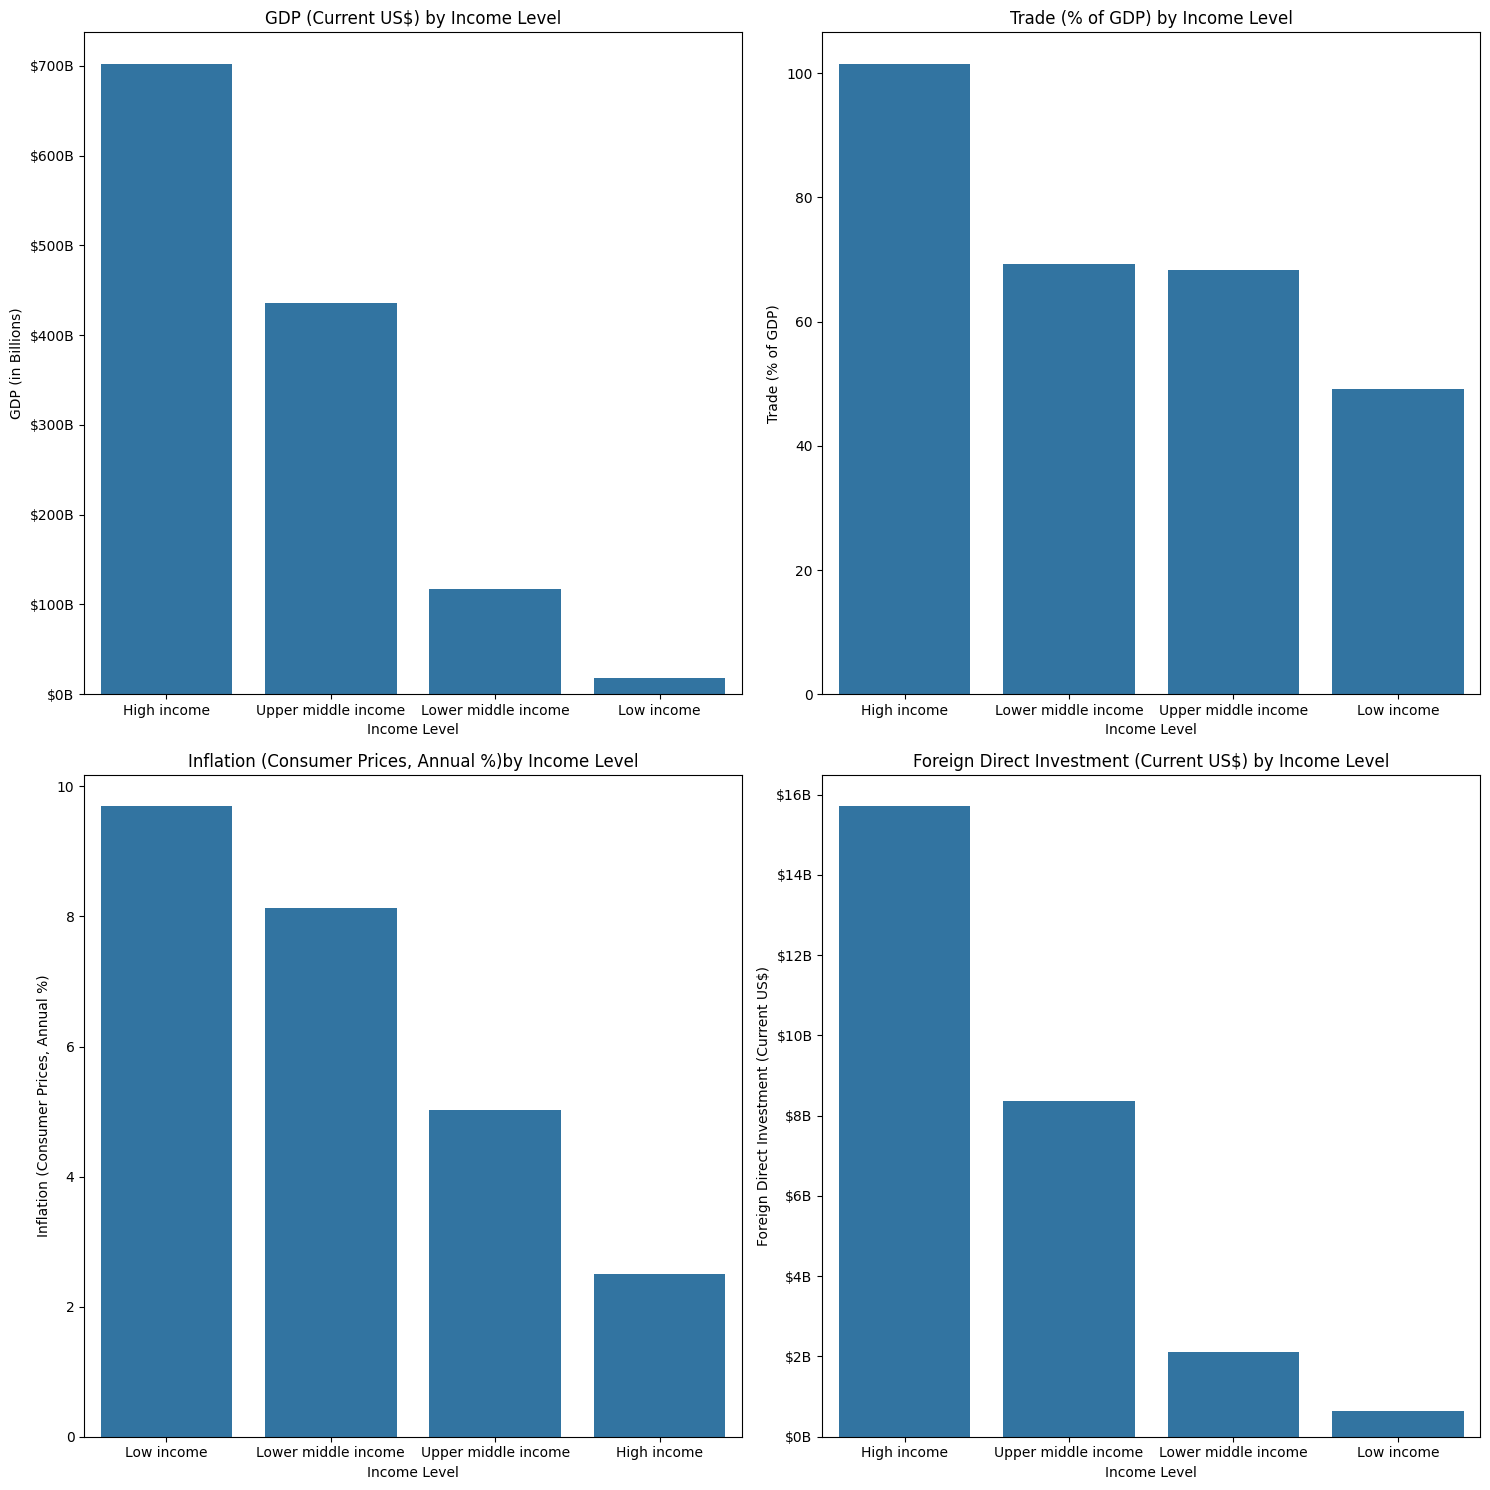

In [ ]:

from matplotlib.ticker import FuncFormatter


data1 = grouped_economic_indicators.sort_values("GDP (Current US$)", ascending=False)
data2 = grouped_economic_indicators.sort_values("Trade (% of GDP)", ascending=False)
data3 = grouped_economic_indicators.sort_values("Inflation (Consumer Prices, Annual %)", ascending=False)
data4 = grouped_economic_indicators.sort_values("Foreign Direct Investment (Current US$)", ascending=False)


def billions_formatter(x, pos):
    return f'${x/1e9:,.0f}B'


fig, axes = plt.subplots(2, 2, figsize=(15, 15))


sns.barplot(
    x="Income Level",
    y="GDP (Current US$)",
    data=data1,
    ax=axes[0, 0]
)
axes[0, 0].set_title("GDP (Current US$) by Income Level", fontsize=12)
axes[0, 0].set_ylabel("GDP (in Billions)")
axes[0, 0].set_xlabel("Income Level")
axes[0, 0].tick_params(axis='x', rotation=0)
axes[0, 0].yaxis.set_major_formatter(FuncFormatter(billions_formatter))

# Second chart: GDP Growth (Annual %)
sns.barplot(
    x="Income Level",
    y="Trade (% of GDP)",
    data=data2,
    ax=axes[0, 1]
)
axes[0, 1].set_title("Trade (% of GDP) by Income Level", fontsize=12)
axes[0, 1].set_ylabel("Trade (% of GDP)")
axes[0, 1].set_xlabel("Income Level")
axes[0, 1].tick_params(axis='x', rotation=0)

# Third chart: Health Expenditure (% of GDP)
sns.barplot(
    x="Income Level",
    y="Inflation (Consumer Prices, Annual %)",
    data=data3,
    ax=axes[1, 0]
)
axes[1, 0].set_title("Inflation (Consumer Prices, Annual %)by Income Level", fontsize=12)
axes[1, 0].set_ylabel("Inflation (Consumer Prices, Annual %)")
axes[1, 0].set_xlabel("Income Level")
axes[1, 0].tick_params(axis='x', rotation=0)

# Fourth chart: Trade (% of GDP)
sns.barplot(
    x="Income Level",
    y="Foreign Direct Investment (Current US$)",
    data=data4,
    ax=axes[1, 1]
)
axes[1, 1].set_title("Foreign Direct Investment (Current US$) by Income Level", fontsize=12)
axes[1, 1].set_ylabel("Foreign Direct Investment (Current US$)")
axes[1, 1].set_xlabel("Income Level")
axes[1, 1].tick_params(axis='x', rotation=0)
axes[1, 1].yaxis.set_major_formatter(FuncFormatter(billions_formatter))

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


The analysis reveals significant disparities across income levels, with high-income countries dominating in GDP, trade, and FDI due to stable economies and global integration, while low-income nations face challenges such as high inflation and limited economic participation.

### Question 3

How do unemployment rates vary across countries with different income levels and what is the trend over time?

#### Answer

I am merging the three data file that I have together.

In [ ]:

merged_data = pd.merge(
    pivoted_df,
    social_pivoted_df,
    on=["Country", "Year"],
    how="inner"
)


merged_data= pd.merge(
    merged_data,
    df_country[["Country", "Income Level", "Region"]],
    on="Country",
    how="left"
)


print("Final Merged Dataset Shape:", merged_data.shape)
merged_data.head()


Final Merged Dataset Shape: (2232, 24)


,Country,Year,Exports of Goods and Services (Current US$),Foreign Direct Investment (Current US$),GDP (Current US$),GDP Growth (Annual %),Imports of Goods and Services (Current US$),"Inflation (Consumer Prices, Annual %)",Lending Interest Rate (%),Official Exchange Rate (LCU per US$),...,Female Life Expectancy (Years),Government Education Spending (% of GDP),Health Expenditure (% of GDP),Health Expenditure Per Capita (Current US$),Life Expectancy (Years),Male Life Expectancy (Years),Primary School Enrollment (%),Secondary School Enrollment (%),Income Level,Region
0,Afghanistan,2013,2.263732e+09,4.831135e+07,2.014642e+10,5.600745,6.811605e+09,7.385772,15.079167,55.377500,...,64.027,3.45446,8.805964,56.305542,62.417,60.791,107.695976,54.754219,Low income,South Asia
1,Afghanistan,2014,2.263732e+09,4.297526e+07,2.049713e+10,2.724543,6.811605e+09,4.673996,15.000000,57.247500,...,64.274,3.69522,9.528878,60.189579,62.545,60.812,109.115517,54.235481,Low income,South Asia
2,Afghanistan,2015,2.263732e+09,1.691466e+08,1.913422e+10,1.451315,6.811605e+09,-0.661709,15.000000,61.143462,...,64.576,3.25580,10.105348,60.058540,62.659,60.760,106.182419,53.285141,Low income,South Asia
3,Afghanistan,2016,2.263732e+09,9.359132e+07,1.811657e+10,2.260314,6.811605e+09,4.383892,15.000000,67.866086,...,65.096,4.54397,11.818590,61.486458,63.136,61.193,106.150284,53.506340,Low income,South Asia
4,Afghanistan,2017,2.263732e+09,5.153390e+07,1.875346e+10,2.647003,6.811605e+09,4.975952,14.836667,68.026904,...,66.099,4.34319,12.620817,66.909218,63.016,60.105,106.129997,55.402149,Low income,South Asia


In [ ]:

country_avg_unemployment = (
    merged_data.groupby("Country", as_index=False)["Unemployment (% of Total Labor Force)"]
    .mean()
    .rename(columns={"Unemployment (% of Total Labor Force)": "Avg Unemployment Rate (%)"})
)


highest_avg_unemployment = country_avg_unemployment.sort_values(
    by="Avg Unemployment Rate (%)", ascending=False
)

top_avg_unemployment_countries = highest_avg_unemployment.head(10)

top_avg_unemployment_countries



,Country,Avg Unemployment Rate (%)
62,Eswatini,29.139818
53,Djibouti,26.457200
176,South Africa,25.019909
212,West Bank and Gaza,22.471727
145,North Macedonia,21.627100
44,"Congo, Rep.",20.691364
69,Gabon,20.415500
135,Namibia,20.388545
74,Greece,20.350900
24,Botswana,20.219200


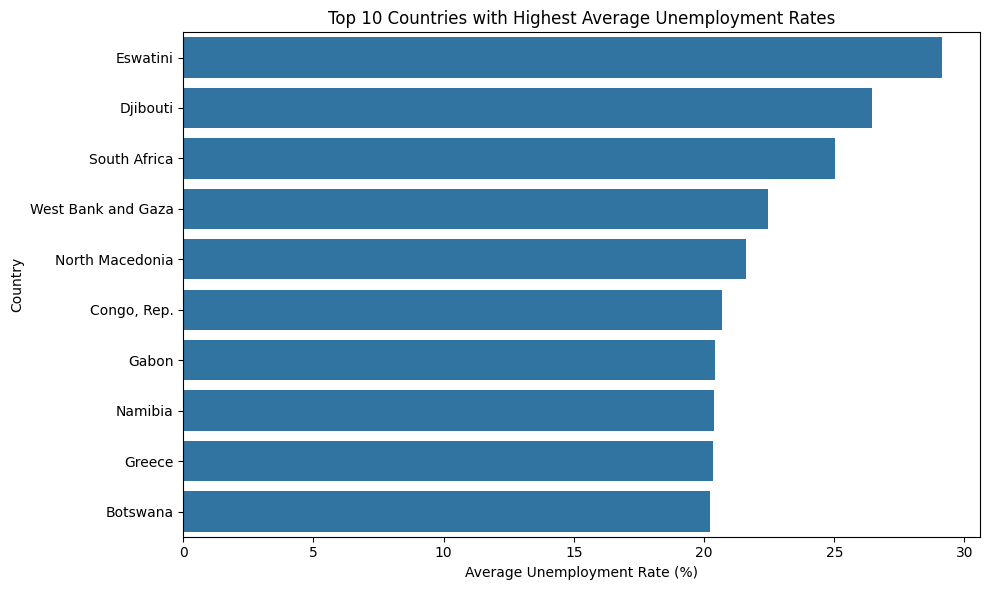

In [ ]:
# Visualization of the above result
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_avg_unemployment_countries,
    x="Avg Unemployment Rate (%)",
    y="Country",
)
plt.title("Top 10 Countries with Highest Average Unemployment Rates")
plt.xlabel("Average Unemployment Rate (%)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

Eswatini, Djibouti, and South Africa are the top three countries with the highest unemployment rates, exceeding 20% on average.

In [ ]:


income_avg_unemployment = pd.merge(
    country_avg_unemployment,
    merged_df[["Country", "Income Level"]].drop_duplicates(),
    on="Country",
    how="left"
)


highest_avg_unemployment_with_income = income_avg_unemployment.sort_values(
    by="Avg Unemployment Rate (%)", ascending=False
)


top_countries_with_income = highest_avg_unemployment_with_income.head(10)


top_countries_with_income



,Country,Avg Unemployment Rate (%),Income Level
62,Eswatini,29.139818,Lower middle income
53,Djibouti,26.457200,Lower middle income
176,South Africa,25.019909,Upper middle income
212,West Bank and Gaza,22.471727,Lower middle income
145,North Macedonia,21.627100,Upper middle income
44,"Congo, Rep.",20.691364,Lower middle income
69,Gabon,20.415500,Upper middle income
135,Namibia,20.388545,Upper middle income
74,Greece,20.350900,High income
24,Botswana,20.219200,Upper middle income


In [ ]:

unemployment_by_income = merged_data.groupby("Income Level")["Unemployment (% of Total Labor Force)"].mean().sort_values()

filtered_unemployment = unemployment_by_income.drop(["Aggregates", "Not classified"], errors='ignore')

sorted_unemployment = filtered_unemployment.sort_values(ascending=False)

sorted_unemployment.head()

,Unemployment (% of Total Labor Force)
Income Level,
Upper middle income,9.308141
Lower middle income,7.945541
High income,6.595838
Low income,5.993527


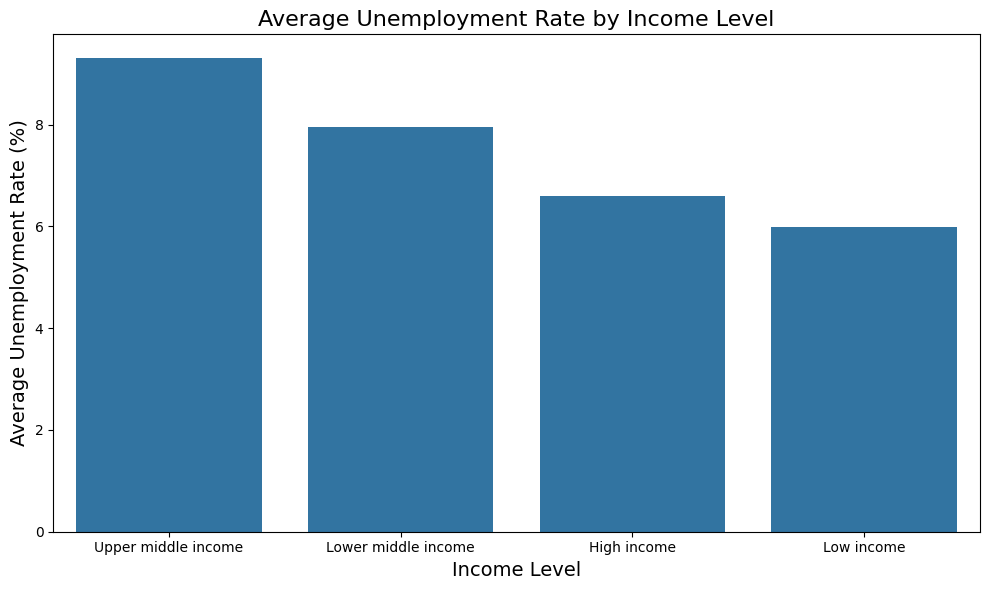

In [ ]:

plt.figure(figsize=(10, 6))
sns.barplot(
    x=sorted_unemployment .index,
    y=sorted_unemployment .values,
)


plt.title("Average Unemployment Rate by Income Level", fontsize=16)
plt.xlabel("Income Level", fontsize=14)
plt.ylabel("Average Unemployment Rate (%)", fontsize=14)
plt.xticks(rotation=0)



plt.tight_layout()
plt.show()


Upper Middle income has the highest unemployment rate follwed by lower middle income. Low income countries have the lowest unemployment rate.

In [ ]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.io import output_notebook

unemployment_trends = merged_df.groupby(["Year", "Income Level"])["Unemployment (% of Total Labor Force)"].mean().reset_index()

color_dict = {
    "High income": "green",
    "Low income": "red",
    "Upper middle income": "blue",
    "Lower middle income": "orange"
}

p = figure(
    title="Unemployment Trends by Income Level (Over Time)",
    x_axis_label="Year",
    y_axis_label="Unemployment Rate (%)",
    x_range=(2012, 2024),
    width=1000,
    height=600,
    tools="pan,box_zoom,reset,save",
)

for income_level, color in color_dict.items():
    income_data = unemployment_trends[unemployment_trends["Income Level"] == income_level]
    source = ColumnDataSource(data={
        "Year": income_data["Year"],
        "Unemployment": income_data["Unemployment (% of Total Labor Force)"]
    })
    p.line(
        x="Year",
        y="Unemployment",
        source=source,
        line_width=2,
        color=color,
        legend_label=income_level
    )
    p.scatter(
        x="Year",
        y="Unemployment",
        source=source,
        size=8,
        color=color,
        legend_label=income_level
    )

p.legend.title = "Income Level"
p.legend.label_text_font_size = "10pt"
p.legend.location = "top_left"
p.add_layout(p.legend[0], 'right')

p.xaxis.ticker = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
p.xaxis.minor_tick_line_color = None
p.yaxis.minor_tick_line_color = None
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
p.legend.click_policy = "hide"
p.title.text_font_size = "14pt"
p.xaxis.axis_label_text_font_size = "12pt"
p.yaxis.axis_label_text_font_size = "12pt"

output_notebook()
show(p)


Upper-middle-income countries have the highest unemployment rates, while high-income countries show steady improvement. Low-income countries report lower rates.Based on the trends, the unemployment rates vary across income levels, with higher-income groups generally experiencing declining unemployment rates over time, while lower-income groups show relatively stagnant or inconsistent patterns.








### Question 4

How do health expenditure patterns vary across income levels, and what trends can be observed over time?

#### Answer

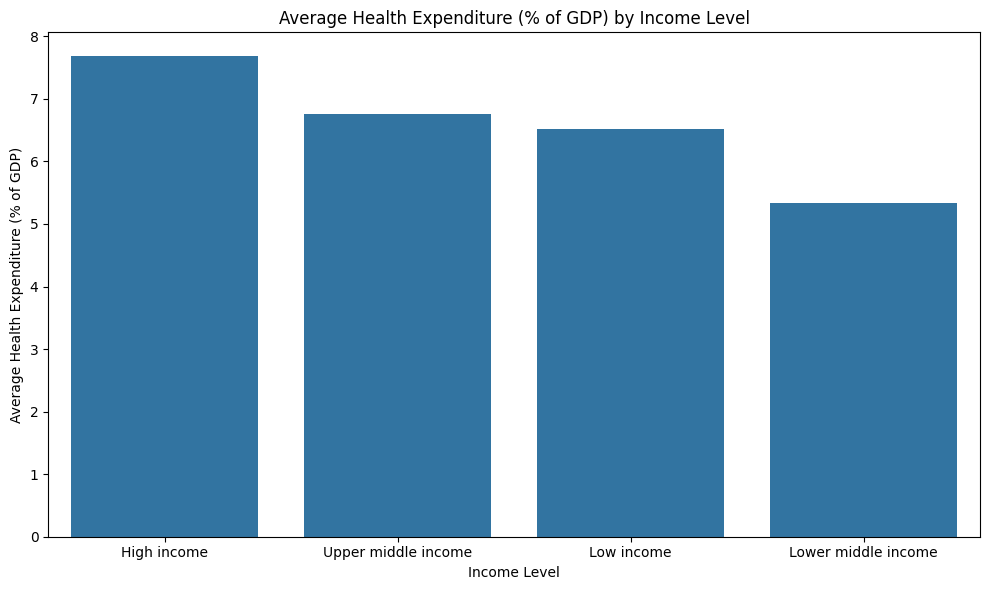

In [ ]:

health_expenditure_by_income = merged_data.groupby("Income Level", as_index=False)["Health Expenditure (% of GDP)"].mean()


health_expenditure_by_income = health_expenditure_by_income.sort_values(by="Health Expenditure (% of GDP)", ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(
    data=health_expenditure_by_income,
    x="Income Level",
    y="Health Expenditure (% of GDP)",

)
plt.title("Average Health Expenditure (% of GDP) by Income Level")
plt.ylabel("Average Health Expenditure (% of GDP)")
plt.xlabel("Income Level")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


High-income countries consistently allocate the highest percentage of GDP to health expenditure, indicating greater investment in healthcare systems.

In [ ]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.io import output_notebook

health_expenditure_trends = merged_data.groupby(["Year", "Income Level"], as_index=False)["Health Expenditure (% of GDP)"].mean()
color_dict = {
    "High income": "green",
    "Low income": "red",
    "Upper middle income": "blue",
    "Lower middle income": "orange"
}

p = figure(
    title="Trends in Health Expenditure (% of GDP) Over Time by Income Level",
    x_axis_label="Year",
    y_axis_label="Health Expenditure (% of GDP)",
    x_range=(2012, 2024),
    width=1000,
    height=600,
    tools="pan,box_zoom,reset,save",
)

for income_level, color in color_dict.items():
    income_data = health_expenditure_trends[health_expenditure_trends["Income Level"] == income_level]
    source = ColumnDataSource(data={
        "Year": income_data["Year"],
        "Health Expenditure": income_data["Health Expenditure (% of GDP)"]
    })
    p.line(
        x="Year",
        y="Health Expenditure",
        source=source,
        line_width=2,
        color=color,
        legend_label=income_level
    )
    p.scatter(
        x="Year",
        y="Health Expenditure",
        source=source,
        size=8,
        color=color,
        legend_label=income_level
    )

p.legend.title = "Income Level"
p.legend.label_text_font_size = "10pt"
p.legend.location = "top_left"
p.add_layout(p.legend[0], 'right')

p.xaxis.ticker = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
p.xaxis.minor_tick_line_color = None
p.yaxis.minor_tick_line_color = None
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
p.legend.click_policy = "hide"
p.title.text_font_size = "14pt"
p.xaxis.axis_label_text_font_size = "12pt"
p.yaxis.axis_label_text_font_size = "12pt"

output_notebook()
show(p)


Trends in health expenditure reveal that high-income countries maintain the highest and most stable spending, with a dip in recent years. Middle-income countries saw a sharp rise around 2020, likely due to pandemic-related needs, followed by a decline. Low-income countries show a steady increase, reflecting gradual improvements in healthcare investment.








### Question 5

How do education expenditure patterns vary across income levels, what trends can be observed over time and how does it correlate to unemployment rate?

#### Answer

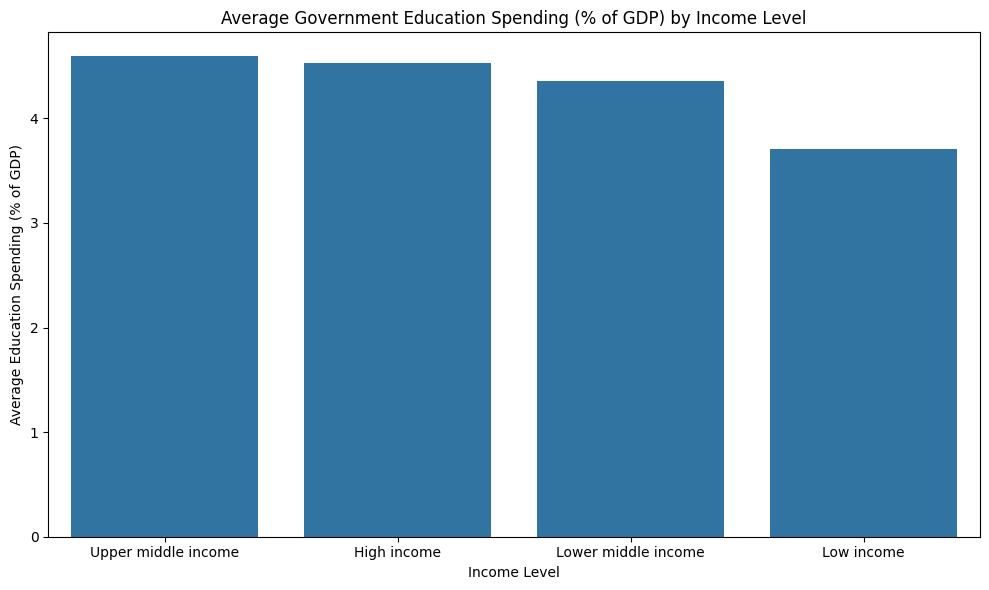

In [ ]:
education_expenditure_by_income = merged_data.groupby("Income Level", as_index=False)["Government Education Spending (% of GDP)"].mean()


education_expenditure_by_income = education_expenditure_by_income.sort_values(by="Government Education Spending (% of GDP)",ascending=False)

plt.figure(figsize=(10, 6))

sns.barplot(
    data=education_expenditure_by_income,
    x="Income Level",
    y="Government Education Spending (% of GDP)",
)

plt.title("Average Government Education Spending (% of GDP) by Income Level")
plt.xlabel("Income Level")
plt.ylabel("Average Education Spending (% of GDP)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


High-income and upper-middle-income countries consistently invest more in education as a percentage of GDP compared to lower-middle-income and low-income countries.


In [ ]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.io import output_notebook

education_trends = merged_data.groupby(["Year", "Income Level"], as_index=False)["Government Education Spending (% of GDP)"].mean()
color_dict = {
    "High income": "green",
    "Low income": "red",
    "Upper middle income": "blue",
    "Lower middle income": "orange"
}

p = figure(
    title="Trends in Education Expenditure (% of GDP) Over Time by Income Level",
    x_axis_label="Year",
    y_axis_label="Government Education Spending (% of GDP)",
    x_range=(2012, 2024),
    width=1000,
    height=600,
    tools="pan,box_zoom,reset,save",
)

for income_level, color in color_dict.items():
    income_data = education_trends[education_trends["Income Level"] == income_level]
    source = ColumnDataSource(data={
        "Year": income_data["Year"],
        "Education Expenditure": income_data["Government Education Spending (% of GDP)"]
    })
    p.line(
        x="Year",
        y="Education Expenditure",
        source=source,
        line_width=2,
        color=color,
        legend_label=income_level
    )
    p.scatter(
        x="Year",
        y="Education Expenditure",
        source=source,
        size=8,
        color=color,
        legend_label=income_level
    )

p.legend.title = "Income Level"
p.legend.label_text_font_size = "10pt"
p.legend.location = "top_left"
p.add_layout(p.legend[0], 'right')

p.xaxis.ticker = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
p.xaxis.minor_tick_line_color = None
p.yaxis.minor_tick_line_color = None
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
p.legend.click_policy = "hide"
p.title.text_font_size = "14pt"
p.xaxis.axis_label_text_font_size = "12pt"
p.yaxis.axis_label_text_font_size = "12pt"

output_notebook()
show(p)


There is a notable rise in education spending for lower-middle-income countries in recent years, suggesting efforts to improve educational systems.


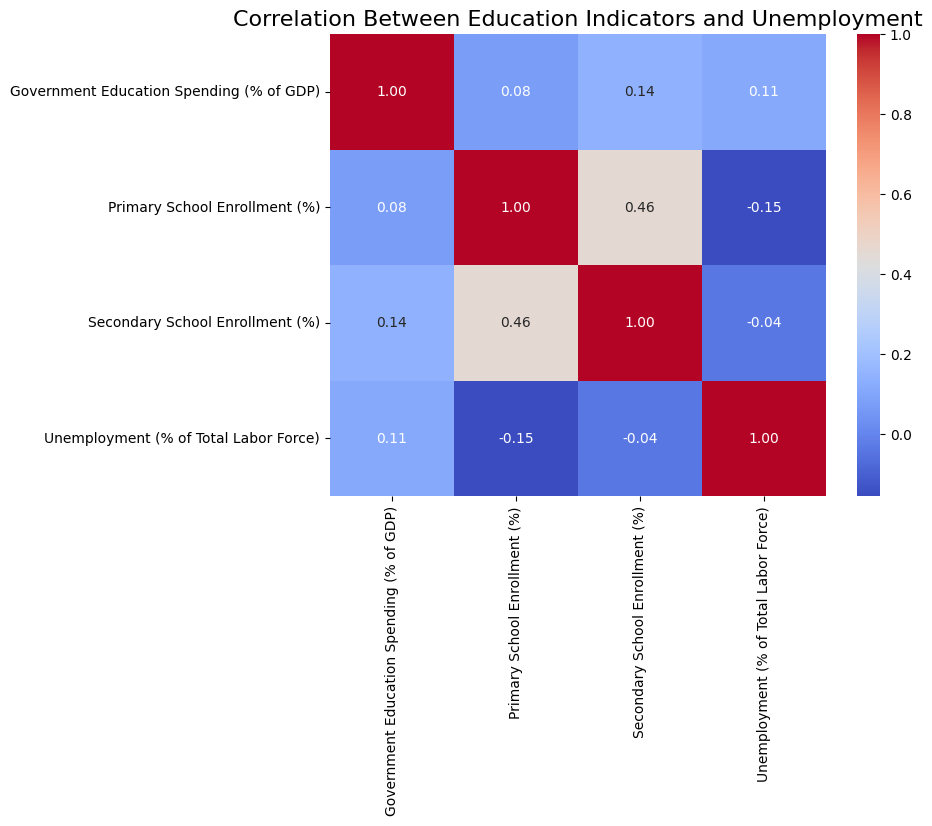

In [ ]:


# Correlation Matrix
education_gdp_corr = merged_data[[
    'Government Education Spending (% of GDP)',
    'Primary School Enrollment (%)',
    'Secondary School Enrollment (%)',
    'Unemployment (% of Total Labor Force)'
]].corr()

# Display Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    education_gdp_corr,
    annot=True, cmap="coolwarm", fmt=".2f"
)
plt.title("Correlation Between Education Indicators and Unemployment", fontsize=16)
plt.show()



Primary school enrollment has a slight negative correlation (-0.15) with unemployment, suggesting that higher enrollment at the foundational level might contribute to better employment outcomes in the long term.
The correlation between Primary School Enrollment (%) and Secondary School Enrollment (%) is moderately positive (0.46). This suggests that countries with higher primary school enrollment tend to have higher secondary school enrollment.

##D4. Summary of key findings

Here are some of the key findings:


*   High-income countries perform better across multiple indicators, including lower unemployment, higher health expenditure, and stable education spending.
*   Low-income countries show gradual improvements in health and education spending, but the gaps remain significant.


*   Factors influencing unemployment extend beyond education, highlighting the need for deeper exploration of policies and labor market dynamics.





##D5 Further research

For Future research:


*   Investigate regional variations within income levels to capture unique patterns.

*  Investigate the role of government policies and political stability in driving disparities between income levels.


*   Use machine learning models to predict future trends in GDP, unemployment, health, and education spending by income level.
*   Environmental indicators to assess the relationship between sustainable development and economic trends.



